In [1]:
%load_ext autotime

time: 138 µs (started: 2023-07-24 10:02:47 +02:00)


In [2]:
import glob
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from joblib import Parallel, delayed
import multiprocessing

time: 2.34 s (started: 2023-07-24 10:02:47 +02:00)


In [3]:
num_cores = multiprocessing.cpu_count()
num_cores

256

time: 2.93 ms (started: 2023-07-24 10:02:49 +02:00)


In [4]:
def read_data(filenames):
    df = pd.DataFrame([], dtype="float")
    columns = []
    for i, filename in enumerate(filenames):
        columns.append(int(filenames[i].split('_')[-1].split('.')[0]))
        df1 = pd.read_csv(filenames[i], index_col=0)
        df = pd.concat([df, df1], axis=1)
    df.columns = columns
    df = df.T        
    return df

def read_data1(lst, outpath):
    df = read_data(lst)
    df.to_csv(outpath, mode='a', index=True, float_format='%.5f')

def get_parallel_list(rand_idx, num_cores=1000):
    num = len(np.array_split(rand_idx, num_cores-5, axis=0)[0])
    new_list = np.array_split(rand_idx, num, axis=0)
    return new_list 

time: 1.41 ms (started: 2023-07-24 10:02:49 +02:00)


In [5]:
filenames1 = sorted(glob.glob('/work/bb1070/b382177/mie/icon/18-07-2023/x1/mie_*.csv'))
filenames2 = sorted(glob.glob('/work/bb1070/b382177/mie/icon/18-07-2023/x2/mie_*.csv'))

time: 19.1 s (started: 2023-07-24 10:02:49 +02:00)


In [6]:
new_list1 = get_parallel_list(filenames1, num_cores=250)
new_list2 = get_parallel_list(filenames2, num_cores=250)

time: 7.02 s (started: 2023-07-24 10:03:08 +02:00)


In [7]:
Parallel(n_jobs=num_cores)(delayed(read_data1)(lst, outpath='/work/bb1070/b382177/mie/icon/24-07-2023/mie_x1.csv') for lst in new_list1)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

time: 5min 33s (started: 2023-07-24 10:03:16 +02:00)


In [8]:
Parallel(n_jobs=num_cores)(delayed(read_data1)(lst, outpath='/work/bb1070/b382177/mie/icon/24-07-2023/mie_x2.csv') for lst in new_list2)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

time: 3min 53s (started: 2023-07-24 10:08:49 +02:00)


In [65]:
df1 = pd.read_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mie_x1.csv', index_col=0).sort_index().iloc[:-23339, :]
df1.index = df1.index.astype('int')

df2 = pd.read_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mie_x2.csv', index_col=0).sort_index().iloc[:8300000, :]
df2.index = df2.index.astype('int')

df = pd.concat([df1, df2], axis=0).drop_duplicates()
df

/tmp/ipykernel_1240571/270521990.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mie_x1.csv', index_col=0).sort_index().iloc[:-23339, :]


,Extinction,Scattering,Absorption,Asym,SSA,coating,core_dia,lambda,n_core,k_core,n_shell,k_shell,density,nobackscat,x
0,0.072795,0.002253,0.070542,0.019297,0.030951,0.0,10.0,100.0,1.486,0.1061,1.464,0.0,2.6,True,0.314159
2,0.034139,0.000141,0.033998,0.004843,0.004118,0.0,10.0,200.0,1.486,0.1061,1.396,0.0,2.6,True,0.157080
8,0.007768,0.000024,0.007744,0.002135,0.003152,0.0,10.0,300.0,1.463,0.0359,1.349,0.0,2.6,True,0.104720
11,0.003332,0.000005,0.003327,0.000946,0.001404,0.0,10.0,450.0,1.45504,0.023075,1.336727,0.0,2.6,True,0.069813
18,0.001833,0.0,0.001832,0.000299,0.000253,0.0,10.0,800.0,1.45299,0.022598,1.329723,0.0,2.6,True,0.039270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44527776,0.8441136588707878,0.10897719156677485,0.7351364673040129,0.08338609171483982,0.12910250938547657,0.4,10000.0,75000.0,1.6135,0.64809787,2.0175,0.7224999999999999,1.7,True,NaN
44527837,1.1173264725925924,0.2027377644730502,0.9145887081195423,0.1178433412428929,0.18144899404614204,0.4,11000.0,70000.0,1.6135,0.64809787,2.0149999999999997,0.725,1.7,True,NaN
44527839,0.8862653286191055,0.12265696777884269,0.7636083608402627,0.0890801355049577,0.138397569912788,0.4,11000.0,80000.0,1.6135,0.64809787,2.02,0.72,1.7,True,NaN
44527902,0.8194509559866502,0.10634234928786922,0.713108606698781,0.08398412766421275,0.12977268317397833,0.4,12000.0,90000.0,1.6135,0.64809787,2.02,0.685,1.7,True,NaN


time: 2min 10s (started: 2023-07-24 10:32:06 +02:00)


In [66]:
df['x'] = np.pi*df['core_dia'].astype('float') / df['lambda'].astype('float')

time: 1.76 s (started: 2023-07-24 10:34:38 +02:00)


In [67]:
df.sort_index().to_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mie_all.csv', index=True)

time: 1min 42s (started: 2023-07-24 10:34:43 +02:00)


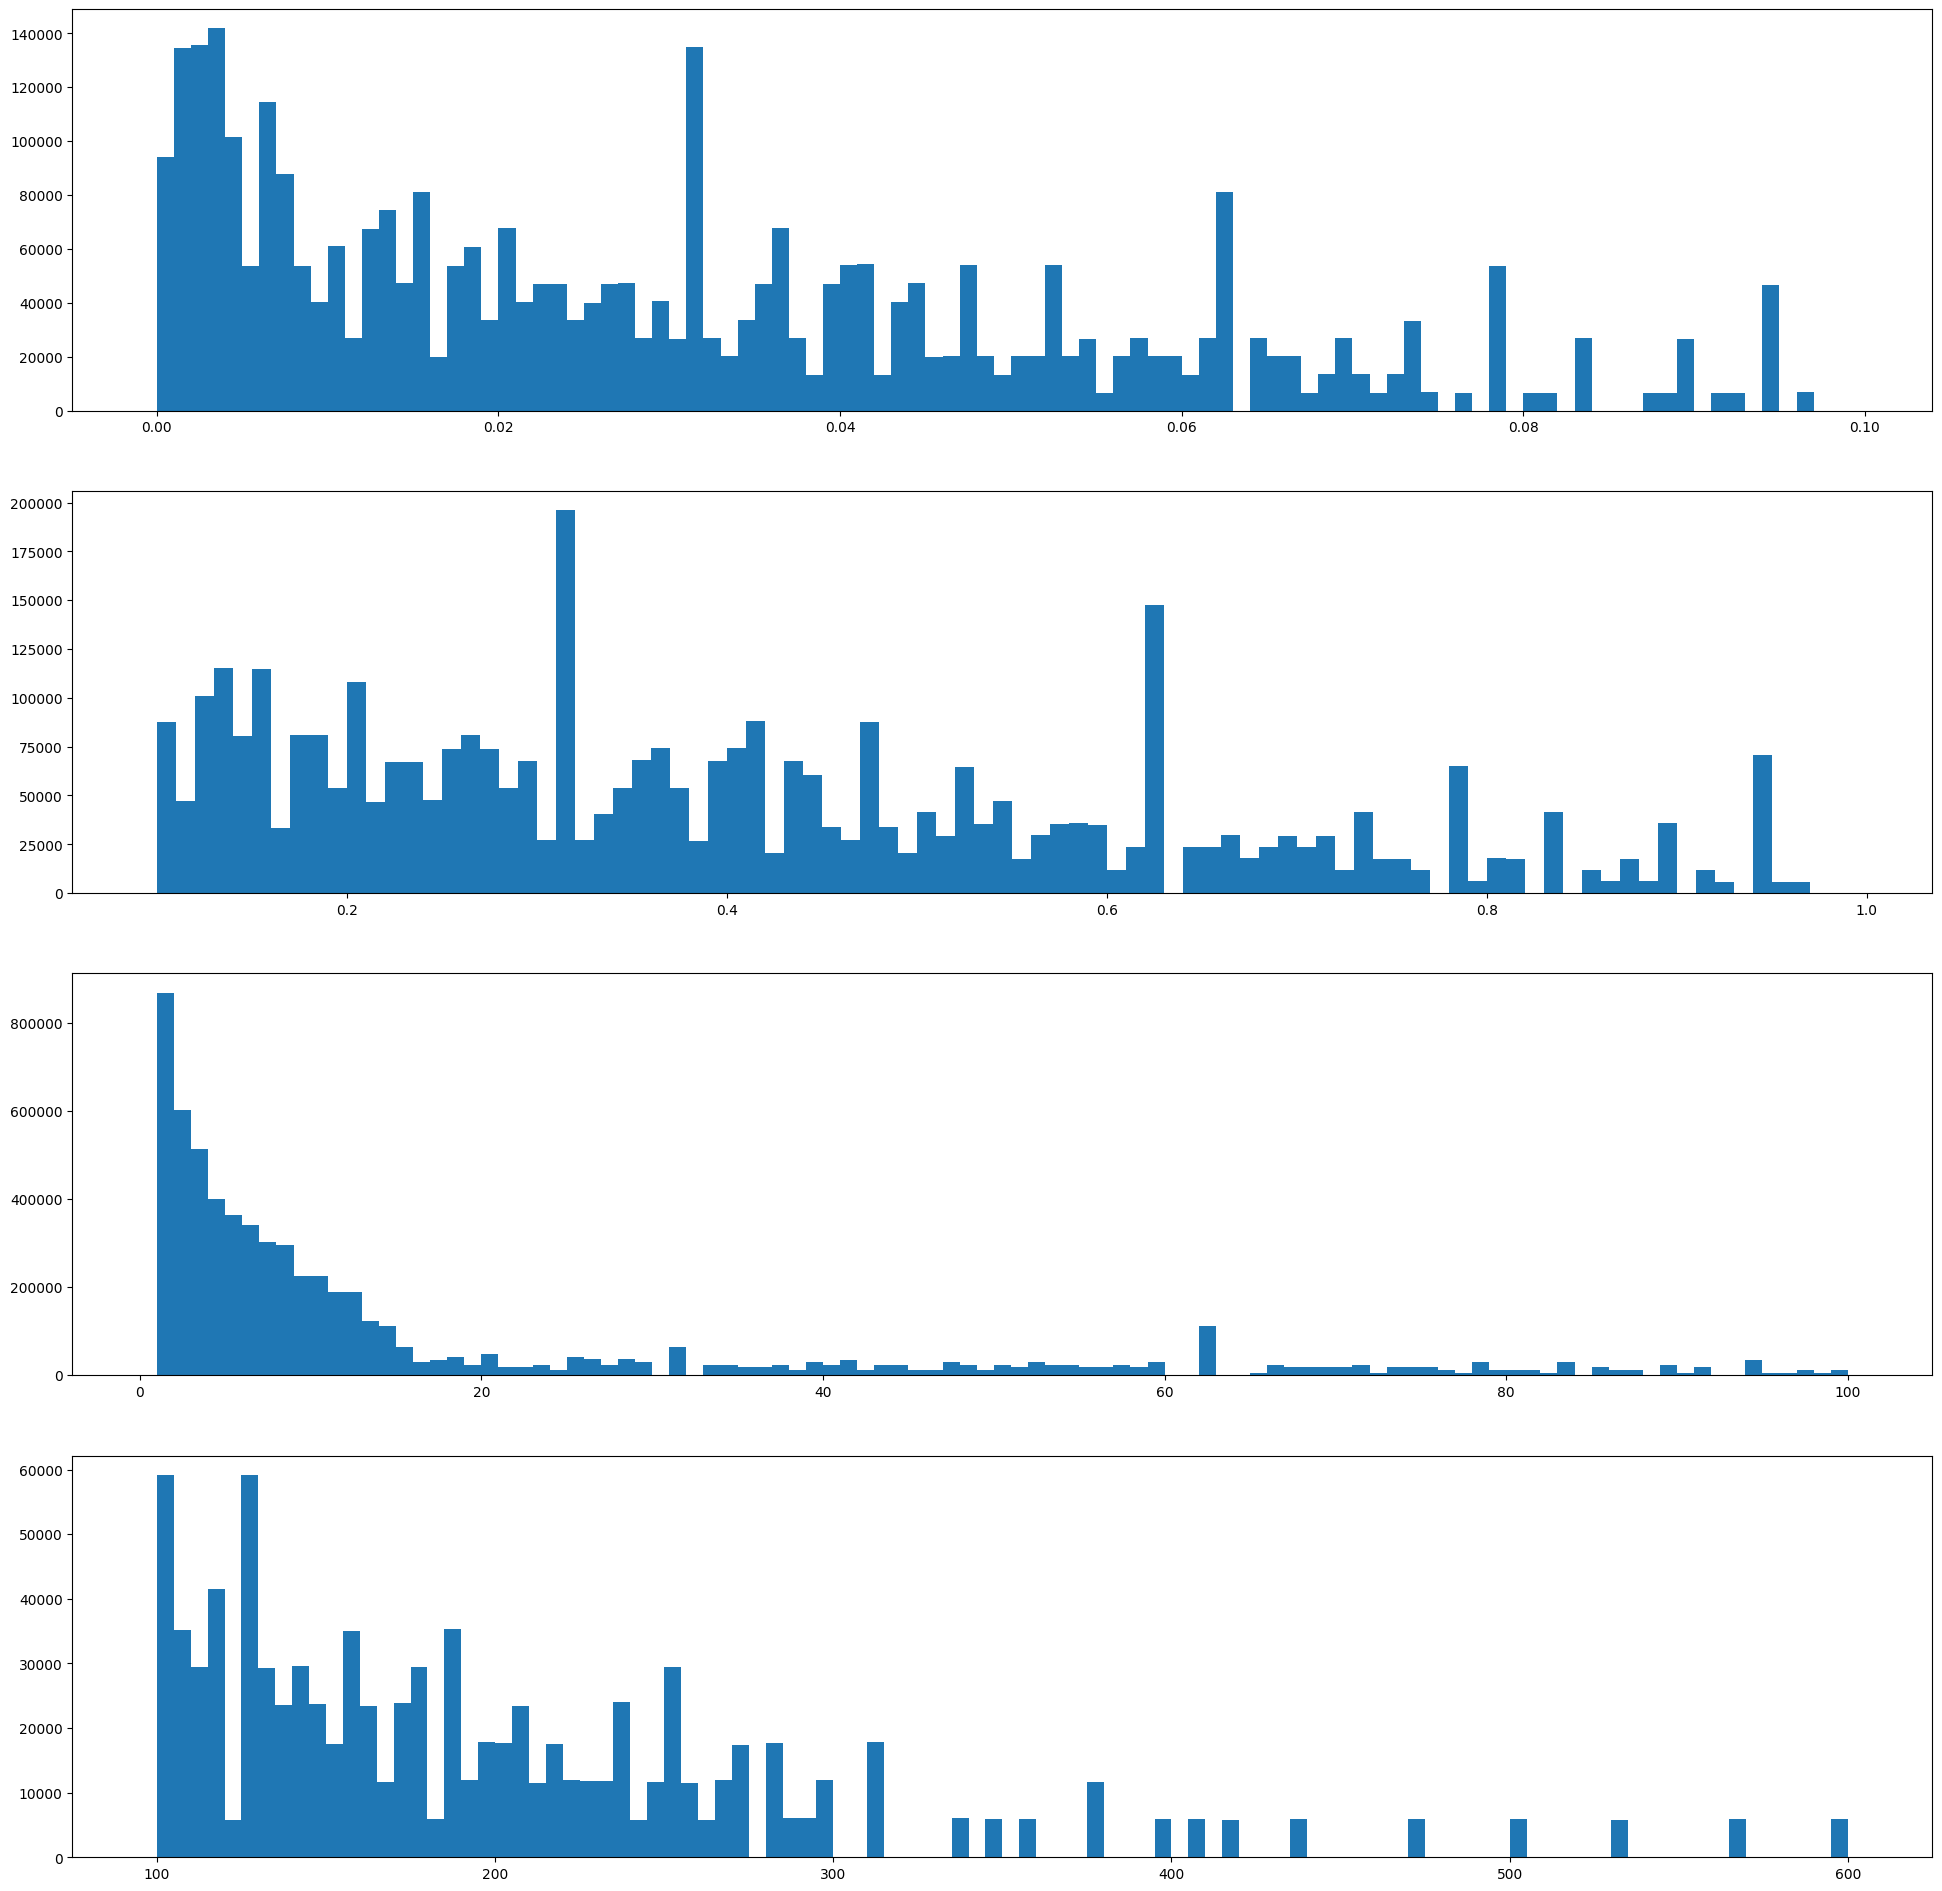

time: 5.26 s (started: 2023-07-24 10:36:25 +02:00)


In [68]:
col = 'x'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(24, 24))
df[col].astype('float').hist(grid=False, bins=np.arange(0, 0.1, 0.001), ax=ax1)
df[col].astype('float').hist(grid=False, bins=np.arange(0.1, 1, 0.01), ax=ax2)
df[col].astype('float').hist(grid=False, bins=np.arange(1, 101, 1), ax=ax3)
df[col].astype('float').hist(grid=False, bins=np.arange(100, 601, 5), ax=ax4)
plt.savefig('/work/bb1070/b382177/mie/icon/24-07-2023/figs/distribution_size_param.png', bbox_inches='tight', dpi=300)
plt.show()

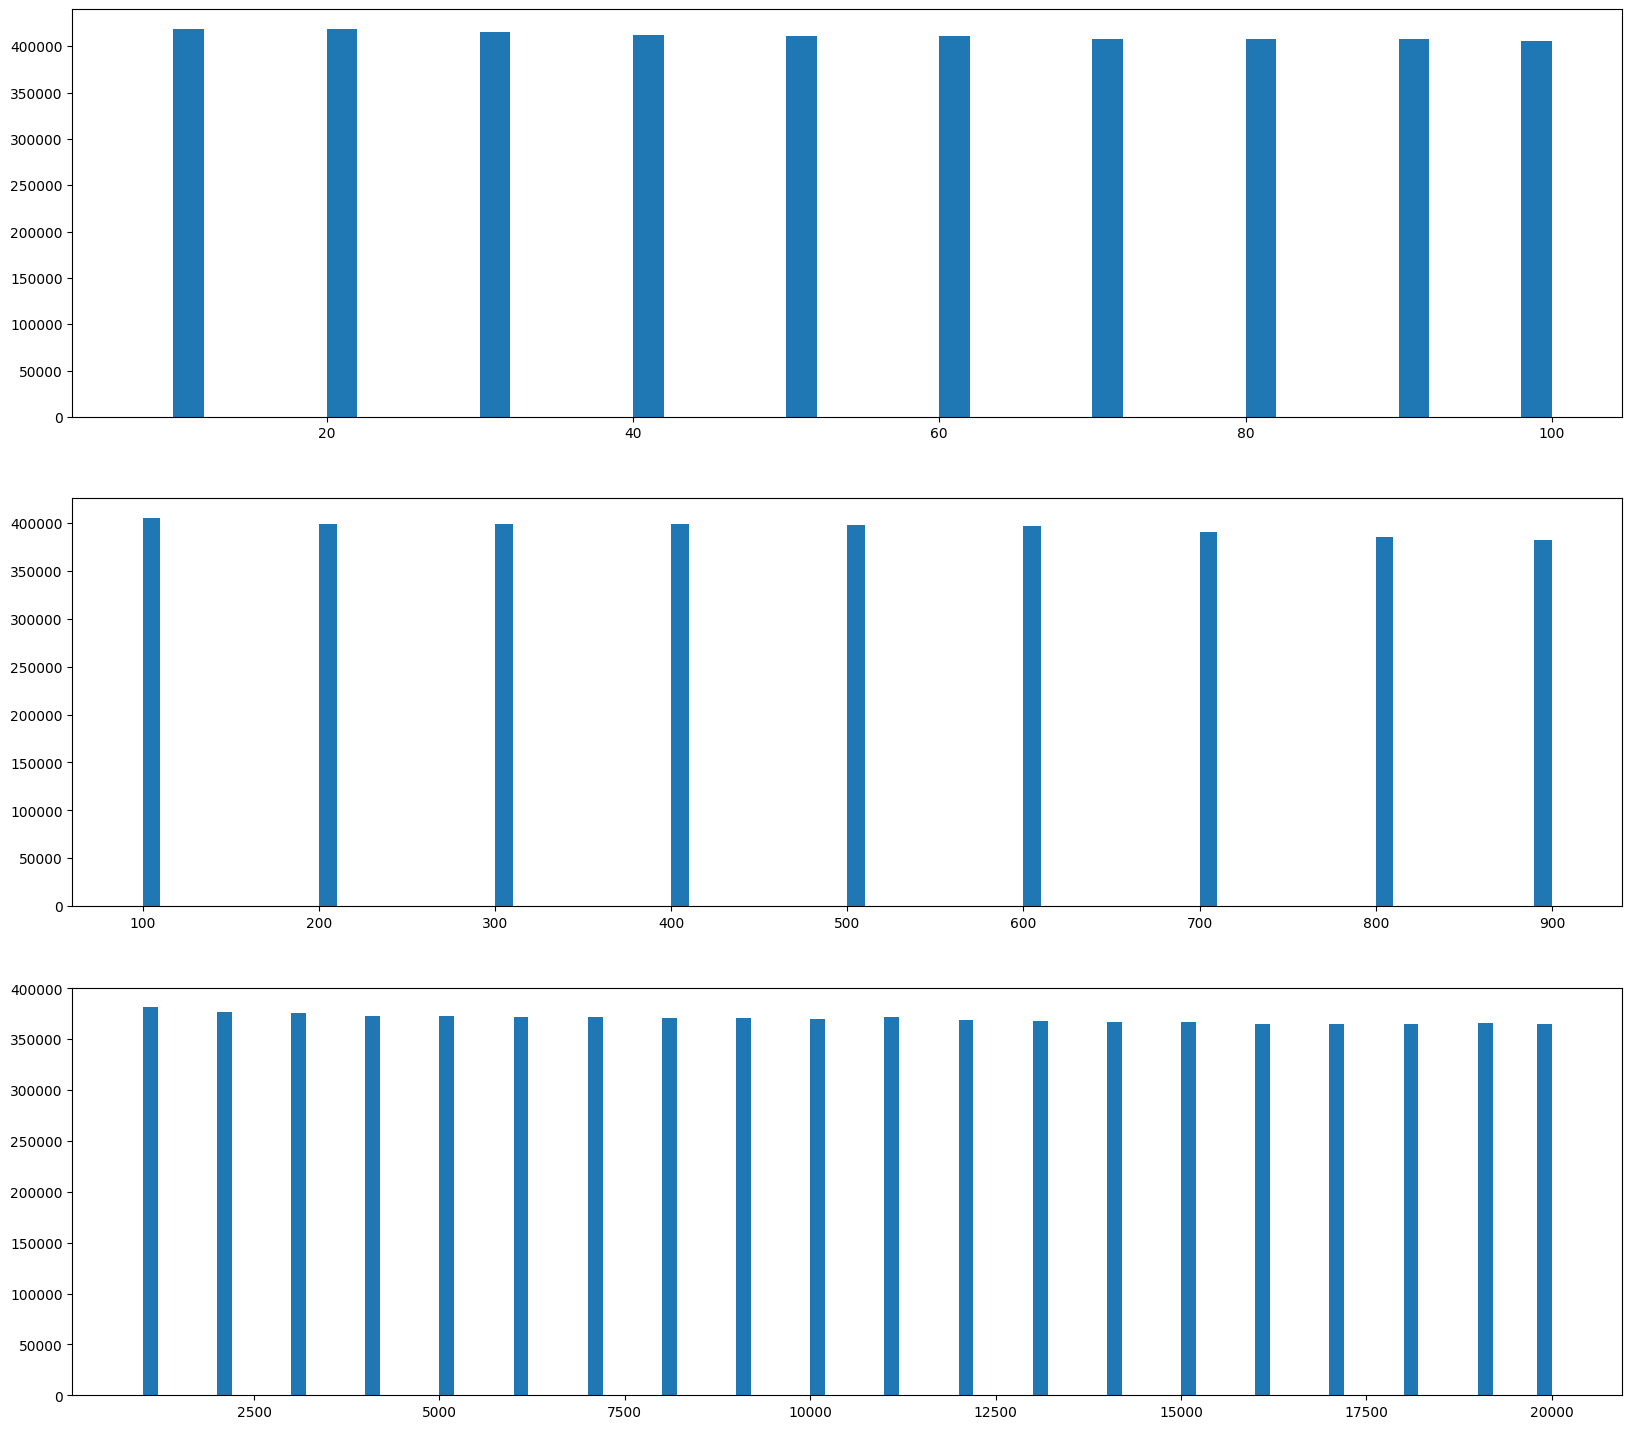

time: 4.89 s (started: 2023-07-24 10:36:30 +02:00)


In [69]:
col = 'core_dia'
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 18))
df[col].astype('float').hist(grid=False, bins=np.arange(8, 101, 2), ax=ax1)
df[col].astype('float').hist(grid=False, bins=np.arange(100, 910, 10), ax=ax2)
df[col].astype('float').hist(grid=False, bins=np.arange(1000, 20100, 200), ax=ax3)
plt.savefig('/work/bb1070/b382177/mie/icon/24-07-2023/figs/distribution_core_dia.png', bbox_inches='tight', dpi=300)
plt.show()

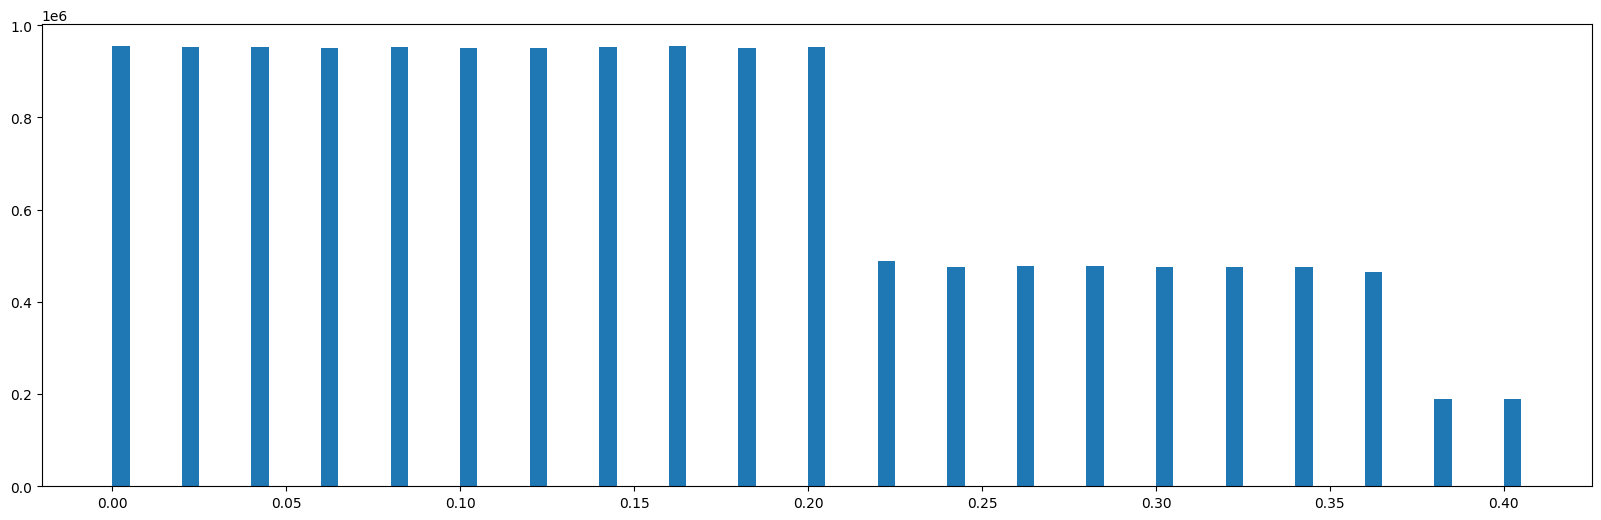

time: 1.53 s (started: 2023-07-24 10:36:35 +02:00)


In [70]:
col = 'coating'
fig, ax1 = plt.subplots(1, 1, figsize=(20, 6))
df[col].astype('float').hist(grid=False, bins=np.arange(0, 0.41, 0.005), ax=ax1)
plt.savefig('/work/bb1070/b382177/mie/icon/24-07-2023/figs/distribution_coating.png', bbox_inches='tight', dpi=300)
plt.show()